**Stage One**

**Step One**

Read in your data

In [2]:
#importing necessary reading, processing and visualization library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pylab import rcParams
from pandas import set_option
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#reading of all dataset
train = pd.read_csv('train.csv')
print("shape of train data is: {}".format(train.shape))
train.head()

shape of train data is: (243, 10)


,id,bedrooms,bathrooms,toilets,parking,description,other_description,location,spec_location,price
0,9026,2,2,3,5,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Off Adekunle Kuye Street., Kilo, Surulere, Lagos",1000000
1,40390,1,1,1,1,1 bedroom mini flat for rent,Mini Flat,surulere,"Nnobi Street, Kilo, Surulere, Lagos",370000
2,85193,2,2,3,2,2 bedroom flat for rent,Relatively New 2bedroom Flat Apartment,gbagada,"Atunrase Estate, Gbagada, Lagos",1100000
3,14410,1,1,1,1,1 bedroom self contained (single rooms) for rent,Luxurious Room Self Contained,gbagada,"Ola Adebiyi Street Peace Estate, Soluyi, Gbaga...",400000
4,86032,3,2,2,2,3 bedroom flat for rent,Renovated 3 Bedrooms Ground Flat,gbagada,"Soluyi, Gbagada, Lagos",1200000


#### **Step 2**






### **House prices prediction across specific locations in Lagos**

* The dataset was gotten from: [kaggle](https://www.kaggle.com/c/pythonhome-challenge/data?select=train.csv)

#### **Data Dictionary**

| Variable Names     | Meaning |
| ----------- | ----------- |
| ID      | This is each house identity number stored in the database.|
| Bedrooms   | This is a numerical variable which is always present in every house and it's the rooms in house where the actual buyer(who has paid for the house) or owner sleeps. It ranges from 1 to 9 in the dataset.This is an independent variable.|     
| Bathrooms |  This is a numerical variable which is always present in every house and it's a room where the actual buyer(who has paid for the house) or owner bath.It range from 1 to 5 in the dataset.This is an independent variable.|
| Toilets | This is a numerical variable which is always present in every house. it range from 1 to 5.This is an independent variable.|
| Parking | This is a numerical variable which is not always present in every house. Its a free space where the owner can keep large things of theirs. It range from 0 to 9.This is an independent variable.|
| Description |  This is a caterogrical variable which holds information related to the type of house in the dataset. Data extracted here will be used as an independent variable.|
| Other_description |This is a caterogrical variable that also holds information about the house related to the kind such as Luxurious, renovated etc.Data extracted here will be used as an independent variable.|
| Location | This is a categorical vaiable that holds the Local Government Area of each house.Data here will be used as an independent variable.|
| Spec_location |  This is a caterogrical variable that holds the specific address of the house.Data extracted here will be used as an independent variable.|
| Price | This is a numerical variable that holds the amount the house will be sold. This is also our dependent variable.|



In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 243 non-null    int64 
 1   bedrooms           243 non-null    int64 
 2   bathrooms          243 non-null    int64 
 3   toilets            243 non-null    int64 
 4   parking            243 non-null    int64 
 5   description        243 non-null    object
 6   other_description  243 non-null    object
 7   location           243 non-null    object
 8   spec_location      243 non-null    object
 9   price              243 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 19.1+ KB


The dataset has 6 numerical variable represented as int64 and 4 categorical variable represented as object

**Step 3**
* Look for missing values, or errors (NA etc) in the dataset.

In [5]:
for i in train.columns:
    print(i + ": "+str(sum(train[i].isnull()))+" missing value")

id: 0 missing value
bedrooms: 0 missing value
bathrooms: 0 missing value
toilets: 0 missing value
parking: 0 missing value
description: 0 missing value
other_description: 0 missing value
location: 0 missing value
spec_location: 0 missing value
price: 0 missing value


This dataset apperently has no missing value. However, i will list some steps to take in solving missing values

#### **Handling missing Value in a dataset**

**Different types of Missing Data and Method to use**
* Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data.

**Methods for filling**

1. we can fill using **Random Sample Imputation**. This method takes random observation from the dataset and use this observation to replace the nan values. The problem here is that every situation randomness won't work.

2. we can also use **Capturing NAN values with a new feature** . 
3. 
End of Distribution imputation which captures the extreme data point to fill missing value 

* Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.For this we can fill with **Mean,Median or mode**. However, this has its own advantage such as roust to outliers and disadvantage such as distort the original variance. 

* Another technique of filling missing values is **MICE imputation** Multivariate Imputation by Chained Equation, is an imputation method which works by filling the missing data multiple times




**Step 4**
* Do some data visualization. For now, we are mostly interested in distribution graphs.

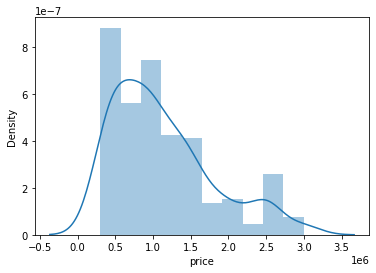

In [6]:
sns.distplot(train['price'])

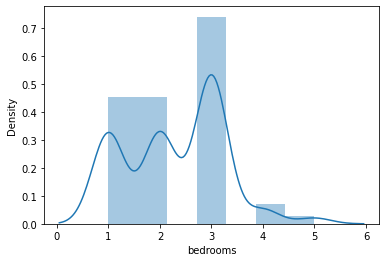

In [7]:
sns.distplot(train['bedrooms'])

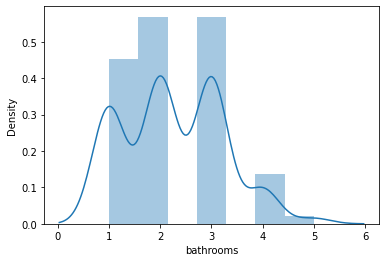

In [8]:
sns.distplot(train['bathrooms'])

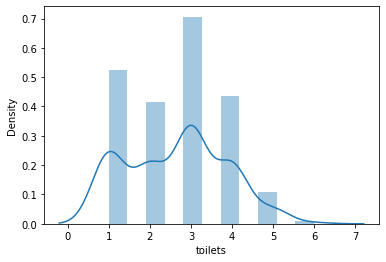

In [9]:
sns.distplot(train['toilets'])

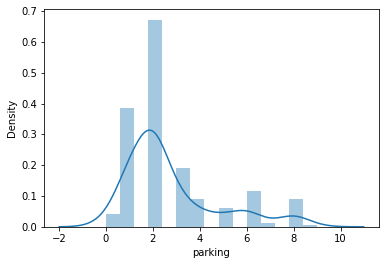

In [10]:
sns.distplot(train['parking'])

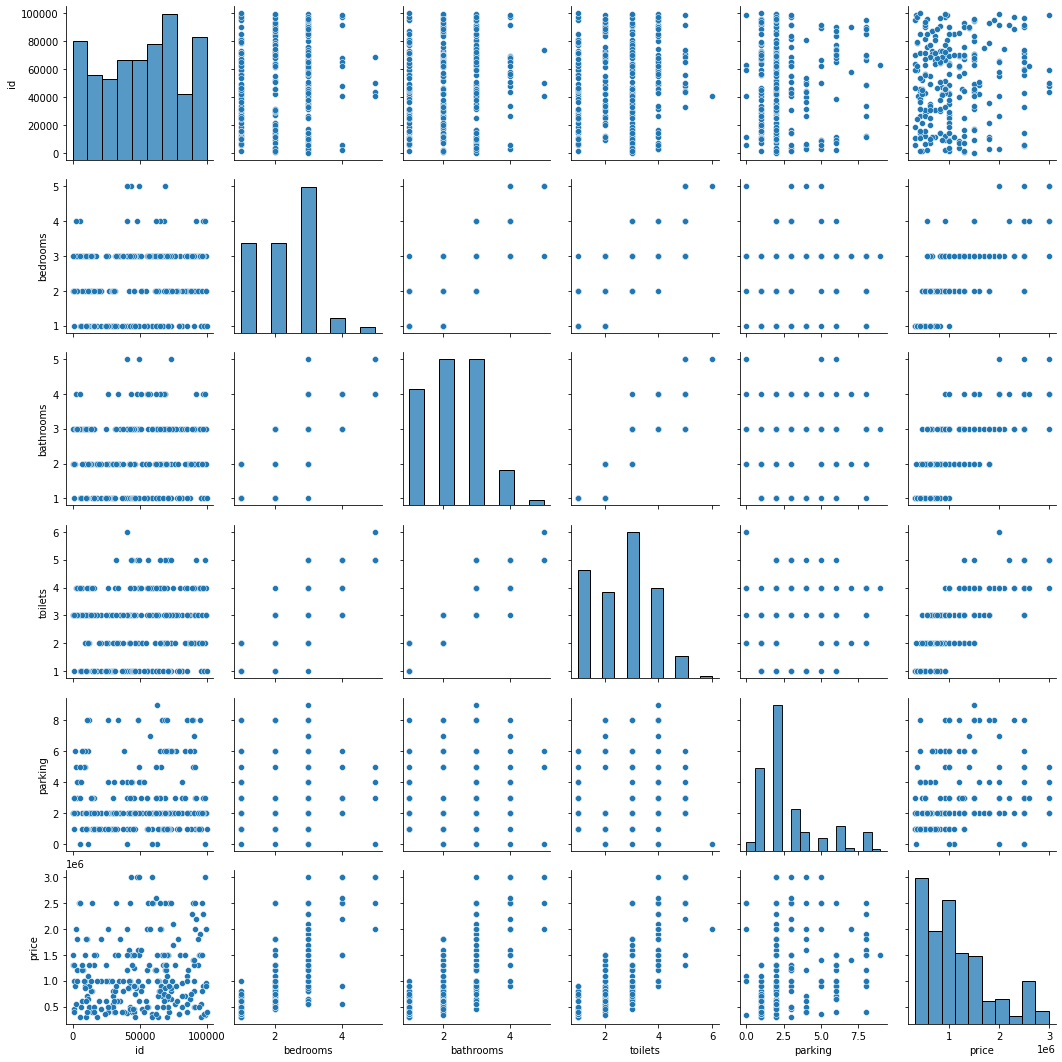

In [11]:
sns.pairplot(train)

#### **Stage 2**

**Step 1**

Do some quantitative overview of your data (for all variables, where this can be applied):
* compute central tendency measures (mean, mode, median etc.),
* compute variability measures.

In [12]:
#checking all Statistical attribute in datase for numerical variable
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,243.0,5.100586e+04,28982.541730,12.0,27576.5,51814.0,71786.0,99752.0
bedrooms,243.0,2.296296e+00,0.954906,1.0,1.0,2.0,3.0,5.0
bathrooms,243.0,2.259259e+00,0.972062,1.0,1.0,2.0,3.0,5.0
toilets,243.0,2.641975e+00,1.205792,1.0,2.0,3.0,3.5,6.0
parking,243.0,2.724280e+00,1.983951,0.0,1.0,2.0,3.0,9.0
price,243.0,1.126352e+06,667289.689426,300000.0,600000.0,1000000.0,1500000.0,3000000.0


In [13]:
#checking all Statistical attribute in datase for categorical variable
train.describe(include='object').T

,count,unique,top,freq
description,243,20,3 bedroom flat for rent,90
other_description,243,219,Mini Flat,6
location,243,3,gbagada,95
spec_location,243,147,"Yaba, Lagos",27


**Write a summary:**
* What can you see from those central tendency/ variability measures?
* Does it corresponds to visual picture of distributions?
* What you can conclude from this analysis?

In [14]:
#Bedroom central tendency/ variability measures
train.bedrooms.describe()

count    243.000000
mean       2.296296
std        0.954906
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: bedrooms, dtype: float64

The Bedroom variable which has its distribution ranked from 1 to 5, can be classified as an ordinal variable. In a sense, this is similar to the categorical case. However, the data is not completely categorical as there is ranking to the data. In this case, we should use the median to grasp the central tendency for further statistical analysis.Also, we could tell the number of rooms that was more frequent in the dataset which 3 which is the 75% the median

In [15]:
#Bathrooms central tendency/ variability measures
train.bathrooms.describe()

count    243.000000
mean       2.259259
std        0.972062
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: bathrooms, dtype: float64

The Bathroom variable is also similar to the bedroom  which has its distribution ranked from 1 to 5, can be classified as an ordinal variable. In a sense, this is similar to the categorical case. However, the data is not completely categorical as there is ranking to the data. In this case, we should use the median to grasp the central tendency for further statistical analysis.Also, in the dataset which  3  which is the 75% the median. moreover, 2 bathroom also have a good number of frequency. 

In [16]:
#Toilet central tendency/ variability measures
train.toilets.describe()

count    243.000000
mean       2.641975
std        1.205792
min        1.000000
25%        2.000000
50%        3.000000
75%        3.500000
max        6.000000
Name: toilets, dtype: float64

The Toilet variable is also similar to the bedroom and bathroom which has its distribution ranked from 1 to 6, can be classified as an ordinal variable. In a sense, this is similar to the categorical case. However, the data is not completely categorical as there is ranking to the data. In this case, we should use the median to grasp the central tendency for further statistical analysis. Also, we could tell the number of rooms that was more frequent in the dataset which  3  which is the 75% the median 

In [17]:
#parking central tendency/ variability measures
train.parking.describe()

count    243.000000
mean       2.724280
std        1.983951
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: parking, dtype: float64

The Parking variable is also similar to the bedroom, bathroom and toilet  which has its distribution ranked from 0 to 9, can be classified as an ordinal variable. In a sense, this is similar to the categorical case. However, the data is not completely categorical as there is ranking to the data. In this case, we should use the median to grasp the central tendency for further statistical analysis. Also, e could tell the number of rooms that was more frequent in the dataset is 2  which is the 50% the mean but since we are using the median due to the nature of the variable

In [18]:
#price central tendency/ variability measures
train.price.describe()

count    2.430000e+02
mean     1.126352e+06
std      6.672897e+05
min      3.000000e+05
25%      6.000000e+05
50%      1.000000e+06
75%      1.500000e+06
max      3.000000e+06
Name: price, dtype: float64

The price variable which is our dependent variable which range from 3m to 3b has its distrubution skwed to the right or a positively skewed distribution, can be classified as a continous skwed variable. In our case, the mean overestimates the central tendency of the data, because the values are distorted by the large number of prices on the right side of the distribution. In this case, I would use the median the represent the central tendency.

Finally, we could tell from the above information that bedrooms,bathroom and toilet have a similar relationship to price. An increase in this 3 will affect price. It is also worthy to note that there exist outliers in the dataset to this variables. There are other things that could affect price such as the description,spec_description, location and other description. exploring this variable will help us in the modeling our model perform better.

Our price variable is skwed, which give thought for data transformation.

#### **Stage 3**

**Step 1**

Try to and out, if there are some linear relationships between variables:
* Pick up only those variable, which are suitable. Remove outliers if required.
* Compute correlation matrix. It would be nice if you can express it visually.
* Write a small report.

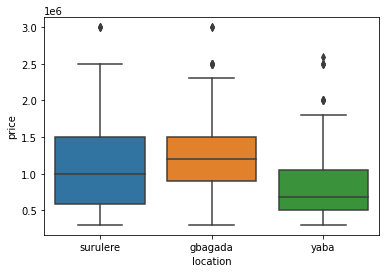

In [19]:
#checking location to price outliers 
sns.boxplot('location', 'price', data=train)

In [20]:
loc = train.groupby('location')
loc.first()

,id,bedrooms,bathrooms,toilets,parking,description,other_description,spec_location,price
location,,,,,,,,,
gbagada,85193,2,2,3,2,2 bedroom flat for rent,Relatively New 2bedroom Flat Apartment,"Atunrase Estate, Gbagada, Lagos",1100000
surulere,9026,2,2,3,5,2 bedroom flat for rent,2 Bedroom Flat,"Off Adekunle Kuye Street., Kilo, Surulere, Lagos",1000000
yaba,83465,2,2,2,6,2 bedroom flat for rent,Lovely 2bed Apartment,"Off At Finbarrs Road Akoka, Akoka, Yaba, Lagos",700000


In [21]:
# percentile list 
perc =[.25, .50, .75, .85, .90]
loc.price.describe(percentiles = perc)

,count,mean,std,min,25%,50%,75%,85%,90%,max
location,,,,,,,,,,
gbagada,95.0,1.282458e+06,643419.127583,300000.0,900000.0,1200000.0,1500000.0,1890000.0,2500000.0,3000000.0
surulere,68.0,1.164265e+06,708393.844787,300000.0,587500.0,1000000.0,1500000.0,1990000.0,2290000.0,3000000.0
yaba,80.0,9.087500e+05,606075.516454,300000.0,500000.0,675000.0,1050000.0,1615000.0,2000000.0,2600000.0


In [22]:
#reucing the price above 1615000..any figure above this is an outlier
train['price']  = np.where(((train['location']=='yaba') & (train['price']>1615000)), 1615000, train['price'])

#reducing outliers in Surulere from 2500000
train['price']  = np.where(((train['location']=='surulere') & (train['price']>2500000)), 2500000, train['price'])

#reducing outliers in gbagada from 2290000
train['price']  = np.where(((train['location']=='gbagada') & (train['price']>2290000)), 2290000, train['price'])


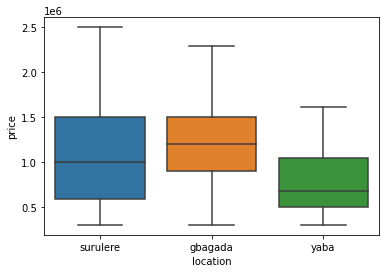

In [23]:
#checking location to price outliers 
sns.boxplot('location', 'price', data=train)

In [24]:
train.corr().style.background_gradient(cmap='coolwarm')

,id,bedrooms,bathrooms,toilets,parking,price
id,1.000000,0.074388,0.066690,0.079033,0.026327,0.092525
bedrooms,0.074388,1.000000,0.825057,0.803098,0.226520,0.738759
bathrooms,0.066690,0.825057,1.000000,0.904482,0.281486,0.740548
toilets,0.079033,0.803098,0.904482,1.000000,0.286762,0.809508
parking,0.026327,0.226520,0.281486,0.286762,1.000000,0.265934
price,0.092525,0.738759,0.740548,0.809508,0.265934,1.000000


**Report**

One reason we choose to use the location to remove outliers is because each location in Lagos has a range of price attached to it based on domain knowledge. Thus, some location have a surge in price could be as a result of the following:
* Data Entry errors
* sampling errors etc

We advise the management to give more attention to the Data entry department so as to avoid this surge in possible feature.

One way to quantify relationship is to use the Pearson correlation coefficient, which is a measure of the linear association between two variables. It has a value between -1 and 1 where:

* -1 indicates a perfectly negative linear correlation between two variables
* 0 indicates no linear correlation between two variables
* 1 indicates a perfectly positive linear correlation between two variables

The further away the correlation coefficient is from zero, the stronger the relationship between the two variables

The correlation between Bedrooms,Bathrooms and toilets is 0.74,0.74 and 0.81 each indicates that they're strongly positively correlated to the dependent variable price. More bedrooms, bathrooms and toilets is associated with high price. There is very little association between parking and price as it shows 0.27 correlation cooficient. However, it it positively correlated with price but has a weak correlation. 

Also, The above matrix shows correlations among the features such that darker shades of red implying high positive correlation and darker shades of blue implying high negative correlations. This is clearly inducing multicollinearity into the model.

To counter such issues, we can use regularization techniques which allow us to lower this variance of the model at the cost of adding some bias into it, such that the total error is reduced. Lower variance implies that the problem of overfitting is tackled automatically, as the model generalizes well to unseen data after regularization.

#### **Step 2**
Pay attention to dependent variable:
* From correlation analysis you know which variables have high correlation with your
dependent variable.

Answer: Bedroom, Bathrooms, Toilets

*  Draw the scatter plots dependent variable vs independent variable
* Write down your observations

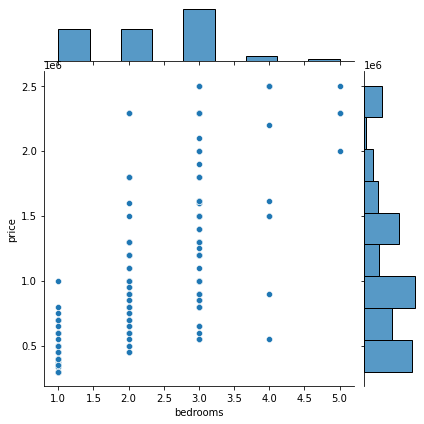

In [25]:

sns.jointplot(x='bedrooms',y='price',data=train,kind='scatter')

**Observations**
* from the graph distribution we could tell the number of rooms that was more frequent in the dataset which  3  which is the 75% the median. I relation to price, more rooms having 3 also records high price and this might pose as an outlier in our dataset amongst other number with low frequency but having very high price.
* Skewness 
* No missing values
* Linear Relationship with price

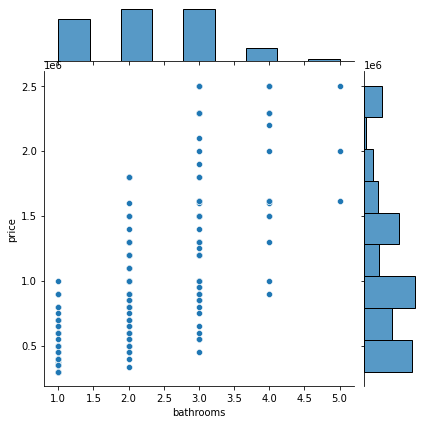

In [26]:
sns.jointplot(x='bathrooms',y='price',data=train,kind='scatter')

**Observations**
* from the graph distribution we could tell the number of rooms that was more frequent in the dataset which  3  which is the 75% the median. moreover, 2 bathroom also have a good number of frequency. In relation to price from the distribution graph, more rooms having 3 also records high price and this might pose as an outlier in our dataset amongst other number with low frequency but having very high price.
* Skewness
* No missing values
* Linear Relationship with price

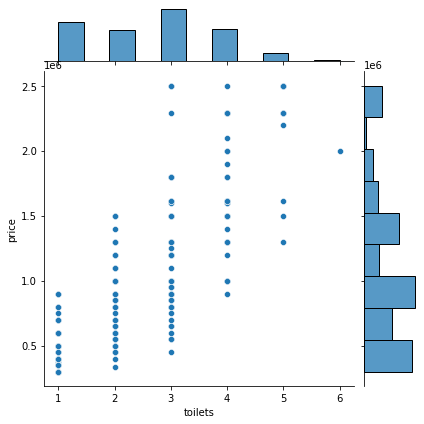

In [27]:
sns.jointplot(x='toilets',y='price',data=train,kind='scatter')

**Observations**
* from the graph distribution we could tell the number of rooms that was more frequent in the dataset which  3  which is the 75% the median. In relation to price from the distribution graph, there was few rooms having 3 that records high price and this might pose as an outlier in our dataset amongst other number with low frequency but having very high price.
* Skewness
* No missing values
* Linear Relationship with price

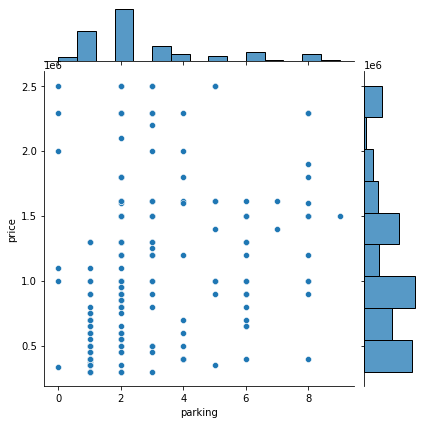

In [28]:
sns.jointplot(x='parking',y='price',data=train,kind='scatter')

**Observation**
* from the graph distribution we could tell the number of rooms that was more frequent in the dataset is 2  which is the 50% the mean but since we are iseing the median due to the nature of the variable. In relation to price from the distribution graph, most house with high parking space will record high price.
* Skewness
* No missing values
* Linear Relationship with price

#### **Step 3**
Pick up one pair of dependent variable vs independent variable
* Construct the linear regression model.
* Draw the scatter plot with line
* Write down your observations

**Simple Linear Regression**

This is an aproach for predicting a quantative response Y on the basis of a single predictor variable X. it assumes that there is approximatly a linear relationship between X and Y

**Model Equation**

$$
Y = \beta_0\ + \beta_1 X

$$
        

$$
\beta_0 =intercept\\
\beta_1 = slope\\
Both\ \beta_0\ and\ \beta_1\ are\ known\ as\ the\ model\ coefficients\ or\ parameters
$$

For the House Price Dataset 
* X will represent one of our variables (bathrooms,bedrooms, toilet or parking)
* Y will represent price

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
y = train.price
X = train[['bedrooms']]

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print(lm.intercept_, lm.coef_)

41111.745179217774 [452801.69519973]


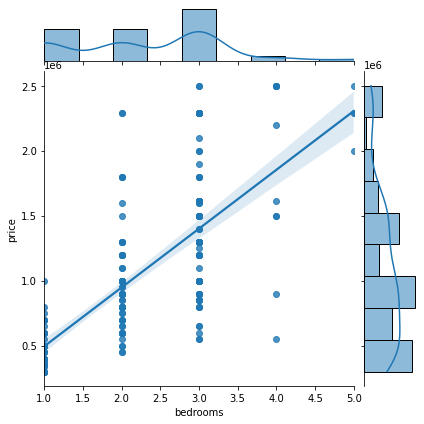

In [34]:
sns.jointplot(x='bedrooms',y='price',data=train,kind='reg')

**Observation**
* increasing number of bedrooms will increase the price of the house.However, this isn't a tentative statement as some house having 4 bedrooms still had low price this will be as a result of other feature which we will explore such as description, spec_description, location and other_des.
* There is a significant relationship between X and Y
* Increasing the value of X will increase the value of Y by 452801


#### **Step 4**
* Try regression with several variables, if possible.
* Additional: try other regression algorithms.

In [35]:
y = train.price
X = train[['bedrooms', 'bathrooms', 'toilets', 'parking']]

In [36]:
# fit the LinearRegression with x and y data 
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(lm.intercept_, lm.coef_)

-58754.11828781711 [172280.93630542 -67091.95998041 326618.69882767  11997.38620452]


**Regularizing Linear Regression Models**

One of the basic assumptions of a multiple linear regression model is that there should be no (or very less) multicollinearity among the feature variables. This essentially means that the feature variables should ideally have no or very less correlation with each other.

A high correlation between the two feature variables gives rise to several problems which we could see in the above correlation plot. If we include one of them in the model, adding the other will have little or no impact on improving the model, but will only make the model more complex.

To counter such issues, we can use regularization techniques which allow us to lower this variance of the model at the cost of adding some bias into it, such that the total error is reduced. Lower variance implies that the problem of overfitting is tackled automatically, as the model generalizes well to unseen data after regularization. 

The regularization techniques work by adding penalty factors to the original OLS cost function such that high coefficient values are penalized, taking them closer to zero.

The features with significant coefficient values are identified after a regularization procedure and other insignificant features with near-zero coefficient values can be dropped.

There are many regularization techniques, of which we discuss the three most commonly used ones viz. Ridge, Lasso and Elastic Net which we will use below

**Ridge Regression**
Ridge regression is an extension of linear regression where the loss function is modified to
minimize the complexity of the model measured as the sum squared value of the coefficient
values (also called the L2-norm).

In [38]:
#import Ridge
from sklearn.linear_model import Ridge
#create Ridge object
rig = Ridge()
# fit the Ridge  with x and y data 
rig.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

**LASSO Regression**
The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modification
of linear regression, like ridge regression, where the loss function is modified to minimize the
complexity of the model measured as the sum absolute value of the coefficient values (also called
the L1-norm)

In [39]:
#import Lasso 
from sklearn.linear_model import Lasso
#create Lasso object
lass = Lasso()
# fit the Lasso with x and y data 
lass.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

**ElasticNet Regression**
ElasticNet is a form of regularization regression that combines the properties of both Ridge
Regression and LASSO regression. It seeks to minimize the complexity of the regression model
(magnitude and number of regression coefficients) by penalizing the model using both the
L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values)

In [40]:
#import the ElasticNet
from sklearn.linear_model import ElasticNet
#create ElasticNet object
ela= ElasticNet()
# fit the ElasticNet with x and y data 
ela.fit(X, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

**Stochastic Gradient Descent**

Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large. The classes SGDClassifier and SGDRegressor provide functionality to fit linear models for classification and regression using different (convex) loss functions and different penalties.

In [41]:
#import sgd 
from sklearn.linear_model import SGDRegressor
#create SGD object 
sgd = SGDRegressor()
# fit the SGDRegressor with x and y data 
sgd.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

**Boosting Algorithms of Gradient Booosting**  Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. This algprithms converts weak learner to strong learners. It combine the prediction of each weak learner using methods like:
* Using average/ weighted average
* Considering prediction has higher vote

Gradient boosting involves three elements:
1. A loss function to be optimized.
2. A weak learner to make predictions.
3. An additive model to add weak learners to minimize the loss function.

**Types of Boosting Algorithms**
* AdaBoost (Adaptive Boosting)
* Gradient Tree Boosting
* XGBoost

However, we will use XGBoost for this regression problem.

XGBooststands for eXtreme Gradient Boosting which can be use for regression and classification is an ensemble learning method whichis an implementation of gradient
boosted decision trees designed for speed and performance.. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. 







In [42]:
#import the model
from xgboost import XGBRegressor
#create XGBregression object
xgb = XGBRegressor()
# fit the XGBregressor with x and y data 
xgb.fit(X, y)

[02:20:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

**Random Forest** A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [43]:
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
# create regressor object 
regr = RandomForestRegressor()  
# fit the regressor with x and y data 
regr.fit(X, y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Nonlinear Machine Learning Algorithms**

**K-Nearest Neighbors**

The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the
training dataset for a new data instance. From the k neighbors, a mean or median output
variable is taken as the prediction.

In [44]:
#import the KNN 
from sklearn.neighbors import KNeighborsRegressor
#create KNeighborsRegressor object
knn= KNeighborsRegressor()
# fit the KNeighborsRegressor with x and y data 
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

**Classification and Regression Trees**

Decision trees or the Classication and Regression Trees (CART as they are known) use the train-
ing data to select the best points to split the data in order to minimize a cost metric.

In [46]:
#import CART
from sklearn.tree import DecisionTreeRegressor
#create DecisionTreeRegressor object
CART = DecisionTreeRegressor()
# fit the KNeighborsRegressor with x and y data 
CART.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**Support Vector Machines**

Support Vector Machines (SVM) were developed for binary classication. The technique has
been extended for the prediction real-valued problems called Support Vector Regression (SVR).

In [47]:
#import SVR
from sklearn.svm import SVR
svr = SVR()
# fit the SVR with x and y data 
svr.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### **Stage 5. Training and testing regression model**

**Step 1**
* Split your dataset into two sets: training and testing sets.
* This splitting must be done randomly (if you don't have timeseries as part of the set,
when the process is more complicated)
* The proportions can be dierent, for example 80/20, 70/30, 90/10, where the bigger
part is the training set, and the smaller part  testing set.

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Step 2**
* Train the regression model on training set.
* You can use dierent sets of features (if possible), with one or more variables.
* You can train dierent types of the models (if you wish to try more), but at least
you need to try linear regression.

In [49]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (194, 4)
Number transactions y_train dataset:  (194,)
Number transactions X_test dataset:  (49, 4)
Number transactions y_test dataset:  (49,)


**K-fold Cross Validation**

Cross validation is an approach that you can use to estimate the performance of a machine
learning algorithm with less variance than a single train-test set split. It works by splitting
the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The
algorithm is trained on k 􀀀 1 folds with one held back and tested on the held back fold. This is
repeated so that each fold of the dataset is given a chance to be the held back test set. After
running cross validation you end up with k dierent performance scores that you can summarize
using a mean and a standard deviation.

The result is a more reliable estimate of the performance of the algorithm on new data. It is
more accurate because the algorithm is trained and evaluated multiple times on dierent data.

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('Ridge', Ridge()))
models.append(('SGD',SGDRegressor()))
models.append(('XGB', XGBRegressor(objective= 'reg:squarederror')))
models.append(('RGF', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('CART', DecisionTreeRegressor()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.sqrt(np.abs(cv_results.mean())), np.sqrt(cv_results.std()))
    print(msg)


LR: 328136.258201 (183655.319152)
LASSO: 328136.225317 (183655.092024)
EN: 339579.825151 (206464.663565)
Ridge: 328021.013273 (183674.965147)
SGD: 327769.408875 (188308.754835)
XGB: 338735.183511 (216006.283142)
RGF: 349045.296001 (206640.655983)
KNN: 352779.257677 (172780.144671)
SVR: 576947.796204 (346769.181803)
CART: 388792.506980 (204460.552074)


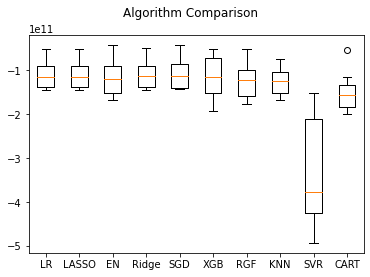

In [51]:

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**Step 3**
* Test you model on testing set.
* Evaluate how well your model performs.
* For that you can apply dierent metrics (MAPE, RMSE, MAE, etc.)
* If it is possible, change the type of the model or set of features, and compare the
results.
* Write report.

**Adding more Features**
* One hot encoding on locations
* Total rooms 
* New or Old buildings
* Type of buildings
* Serviced buildings and not serviced buildings
* Buildings in Estate or Not

In [52]:
#varable search hold the words to be searched for with the column other_description
search_word = '|'.join(['new','almost completed','almost complete'])
#creating a variable and converting all column tex to small letters before searching for the desired words 
cond_  = train['other_description'].str.lower().str.contains(search_word) 
#creating a new column abd setting a condition whereever it finds the word in variable search_word transform to 1 if not 0
train['New/Old'] = np.where(cond_, 1, 0)
#print statement to check to count the 1 and o
print(train['New/Old'].value_counts())

0    192
1     51
Name: New/Old, dtype: int64


In [53]:
#varable search hold the words to be searched for with the column other_description
search_word = '|'.join(['new','luxurious','executive','luxury','newly','attic','Exquisitely'])
#creating a variable and converting all column tex to small letters before searching for the desired words
cond_ = train['other_description'].str.lower().str.contains(search_word)
#creating a new column and setting a condition whereever it finds the word in variable search_word transform to 1 if not 0
train['Type'] = np.where(cond_, 1, 0)
#print statement to check to count the 1 and 0
print(train['Type'].value_counts())

0    149
1     94
Name: Type, dtype: int64


In [54]:
#varable search hold the words to be searched for with the column other_description
search_word = '|'.join(['well','serviced','service','maintained','renovated','Decent','relatively'])
#creating a variable and converting all column tex to small letters before searching for the desired words
cond_= train['other_description'].str.lower().str.contains(search_word) 
train['Serviced/Not'] = np.where(cond_, 1, 0)
#print statement to check to count the 1 and 0
print(train['Serviced/Not'].value_counts())

0    195
1     48
Name: Serviced/Not, dtype: int64


In [55]:
#varable search hold the words to be searched for with the column other_description
search_word = '|'.join(['estate'])
#creating a variable and converting all column tex to small letters before searching for the desired words
cond_ = train['spec_location'].str.lower().str.contains(search_word)
#creating a new column and setting a condition whereever it finds the word in variable search_word transform to 1 if not 0
train['Estate/Not'] = np.where(cond_, 1, 0)
#print statement to check to count the 1 and 0
print(train['Estate/Not'].value_counts())

0    211
1     32
Name: Estate/Not, dtype: int64


In [56]:
#summation of all rooms to get total rooms 
train['Totalrooms'] = train['bedrooms'] + train['bathrooms'] + train['toilets']

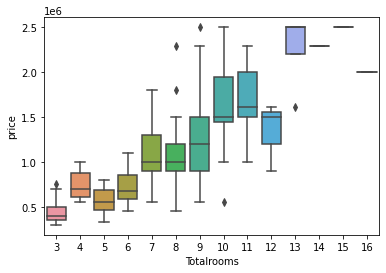

In [57]:
#box plot to check for outliers in totalrooms and price 
sns.boxplot('Totalrooms', 'price',  data=train)

In [58]:
tot = train.groupby('Totalrooms')
tot.first()

,id,bedrooms,bathrooms,toilets,parking,description,other_description,location,spec_location,price,New/Old,Type,Serviced/Not,Estate/Not
Totalrooms,,,,,,,,,,,,,,
3,40390,1,1,1,1,1 bedroom mini flat for rent,Mini Flat,surulere,"Nnobi Street, Kilo, Surulere, Lagos",370000,0,0,0,0
4,95381,1,1,2,1,1 bedroom mini flat for rent,Newly Built Miniflat,surulere,"Off Olufemi Street By Ogunlana Drive, Ogunlana...",550000,1,1,0,0
5,90018,1,2,2,2,1 bedroom mini flat for rent,Executive Mini Flat,surulere,"Babs Animashaun Road, Bode Thomas, Surulere, L...",500000,0,1,0,0
6,83465,2,2,2,6,2 bedroom flat for rent,Lovely 2bed Apartment,yaba,"Off At Finbarrs Road Akoka, Akoka, Yaba, Lagos",700000,0,0,0,0
7,9026,2,2,3,5,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Off Adekunle Kuye Street., Kilo, Surulere, Lagos",1000000,0,0,0,0
8,55172,3,2,3,3,3 bedroom flat for rent,Relatively New 3b Bedroom Flat Apartment,gbagada,"Ifako, Gbagada, Lagos",1200000,1,1,1,0
9,70725,3,3,3,6,3 bedroom flat for rent,A Newly Renovated 3 Bedroom Flat With Modern F...,gbagada,"Ifako, Gbagada, Lagos",1500000,1,1,1,0
10,95063,3,3,4,8,3 bedroom flat for rent,A Luxurious 3 Bedroom Flat With Modern Facilities,gbagada,"Millennium Estate, Gbagada, Lagos",1900000,0,1,0,1
11,55910,3,3,5,2,3 bedroom house for rent,Luxuriously Built And Tastefully Finished (3) ...,gbagada,"Gbagada Phase 1, Gbagada, Lagos",2290000,0,1,0,0


In [59]:
# percentile list 
perc =[.25, .50, .75, .85, .90]
tot.price.describe(percentiles = perc)

,count,mean,std,min,25%,50%,75%,85%,90%,max
Totalrooms,,,,,,,,,,
3,51.0,4.386275e+05,110435.856638,300000.0,350000.0,400000.0,500000.0,500000.0,600000.0,750000.0
4,10.0,7.400000e+05,152388.392675,550000.0,612500.0,700000.0,875000.0,900000.0,910000.0,1000000.0
5,10.0,5.733500e+05,162931.486964,333500.0,462500.0,550000.0,687500.0,765000.0,800000.0,800000.0
6,16.0,7.125000e+05,190175.357675,450000.0,587500.0,675000.0,850000.0,887500.0,950000.0,1100000.0
7,44.0,1.111364e+06,294496.739897,550000.0,900000.0,1000000.0,1300000.0,1355000.0,1500000.0,1800000.0
8,23.0,1.097391e+06,395338.949985,450000.0,900000.0,1000000.0,1200000.0,1440000.0,1500000.0,2290000.0
9,25.0,1.221400e+06,477333.129655,550000.0,900000.0,1200000.0,1500000.0,1615000.0,1615000.0,2500000.0
10,39.0,1.652179e+06,445550.804699,550000.0,1450000.0,1500000.0,1950000.0,2290000.0,2290000.0,2500000.0
11,13.0,1.710000e+06,398110.118770,1000000.0,1500000.0,1615000.0,2000000.0,2290000.0,2290000.0,2290000.0


In [60]:
#code to check the dataset for totalrooms and labels matching 7.Then for each line below the figure is the bench mark
train['price']  = np.where(((train['Totalrooms']== 3) & (train['price']>600000)), 600000, train['price'])

train['price']  = np.where(((train['Totalrooms']== 8) & (train['price']>1500000)), 1500000, train['price'])

train['price']  = np.where(((train['Totalrooms']== 9) & (train['price']>1615000)), 1615000, train['price'])

train['price']  = np.where(((train['Totalrooms']== 10) & (train['price']<1450000)), 1450000, train['price'])

train['price']  = np.where(((train['Totalrooms']== 13) & (train['price']<2200000)), 2200000, train['price'])

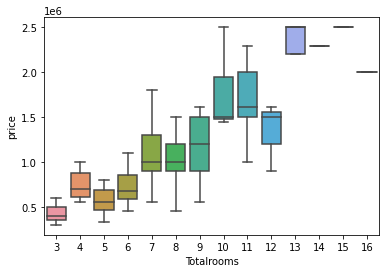

In [61]:
#box plot to check for outliers in totalrooms and price 
sns.boxplot('Totalrooms', 'price',  data=train)

In [62]:
#creating a dummie for a categorical variable 
dummyLocation = pd.get_dummies(train['location'])
#comcatinating dummy and fulldata
train = pd.concat([train, dummyLocation], axis =1)

In [63]:
X = train[['bedrooms', 'bathrooms', 'toilets', 'parking','New/Old', 'Type', 'Serviced/Not', 'Estate/Not', 'Totalrooms', 'gbagada',
       'surulere', 'yaba']]
y = train.price

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [65]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('Ridge', Ridge()))
models.append(('SGD',SGDRegressor()))
models.append(('XGB', XGBRegressor(objective= 'reg:squarederror')))
models.append(('RGF', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('CART', DecisionTreeRegressor()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.sqrt(np.abs(cv_results.mean())), np.sqrt(cv_results.std()))
    print(msg)

LR: 295531.692592 (208919.051049)
LASSO: 295682.104762 (208718.583378)
EN: 297820.951124 (187662.688977)
Ridge: 294676.436585 (206214.668353)
SGD: 305520.767836 (199347.674140)
XGB: 302463.571822 (224210.808322)
RGF: 317949.556523 (209830.201925)
KNN: 304161.744740 (185126.925847)
SVR: 573103.529913 (354447.018997)
CART: 397737.167173 (249860.169282)


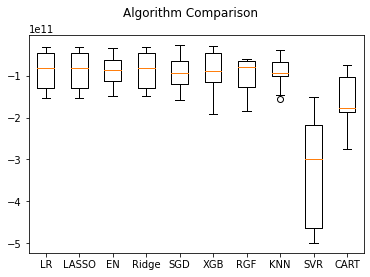

In [66]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [67]:
from sklearn import metrics

In [68]:
#creating a function to calculate MAPE
from sklearn.metrics import mean_squared_error
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    

In [69]:
from scipy.stats import norm
def plot_model_evaluation(y_test, pred_test):
    y_true = y_test
    residuals = y_true - pred_test
    fig, axs = plt.subplots(1, 2, figsize=(20,5))

    p0 = sns.histplot(residuals, ax=axs[0], stat="density")
    axs[0].set_xlabel('Residuals', fontsize=18)
    axs[0].set_ylabel('')
    p0.text(residuals.min(), p0.get_ylim()[1]*0.8, "Mean of residuals: {:.2f}".format(residuals.mean()))
    
    mean,std = norm.fit(residuals)
    x = np.linspace(residuals.min(), residuals.max(), 100)
    y = norm.pdf(x, mean, std)
    sns.lineplot(x=x, y=y, ax=axs[0])
    
    sns.scatterplot(x=y_true, y=pred_test, ax=axs[1])
    axs[1].set_xlabel('Actual', fontsize=18)
    axs[1].set_ylabel('Predicted', fontsize=18)
    sns.lineplot(x=[0, max(y_true)], y=[0, max(y_true)], ax=axs[1])

In [70]:
#using LinearRegression without cross validating dataset
model_ = LinearRegression()
model_.fit(X_train, y_train)
pred_train = model_.predict(X_train)
pred_test = model_.predict(X_test)
print('Train MAPE: ', mape(y_train, pred_train))
print('Test MAPE: ', mape(y_test, pred_test))
print ("Train RMSE: ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print ("Test RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print ("Train MSE: ",metrics.mean_squared_error(y_train, pred_train))
print ("Test MSE: ",metrics.mean_squared_error(y_test, pred_test))


Train MAPE:  21.517174505184542
Test MAPE:  23.074564002373403
Train RMSE:  274049.500914534
Test RMSE:  303383.98460037407
Train MSE:  75103128951.50516
Test MSE:  92041842112.0


In [71]:
#using Ridge 
# Create the hyperparameter grid
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=7)
rsearch.fit(X_train, y_train)
print(rsearch)

RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c63a34278>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)


In [72]:
#predicting using tuned Ridge
pred_train = rsearch.predict(X_train)
pred_test = rsearch.predict(X_test)
print('Train MAPE: ', mape(y_train, pred_train))
print('Test MAPE: ', mape(y_test, pred_test))
print ("Train RMSE: ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print ("Test RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print ("Train MSE: ",metrics.mean_squared_error(y_train, pred_train))
print ("Test MSE: ",metrics.mean_squared_error(y_test, pred_test))

Train MAPE:  21.815159942932446
Test MAPE:  23.195666062159987
Train RMSE:  274120.9912230711
Test RMSE:  302795.2963362656
Train MSE:  75142317829.11903
Test MSE:  91684991483.36687


In [73]:
#using Lasso
# define model
model = Lasso()
# define model evaluation method
cv = KFold(n_splits=7, random_state=42)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)

In [74]:
pred_train = results.predict(X_train)
pred_test = results.predict(X_test)
print('Train MAPE: ', mape(y_train, pred_train))
print('Test MAPE: ', mape(y_test, pred_test))
print ("Train RMSE: ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print ("Test RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print ("Train MSE: ",metrics.mean_squared_error(y_train, pred_train))
print ("Test MSE: ",metrics.mean_squared_error(y_test, pred_test))

Train MAPE:  21.80618077250421
Test MAPE:  23.252725556735413
Train RMSE:  274066.34908034146
Test RMSE:  302870.9487527185
Train MSE:  75112363698.22757
Test MSE:  91730811598.37186


In [75]:
# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=7)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

pred_train = gm_cv.predict(X_train)
pred_test = gm_cv.predict(X_test)
print('Train MAPE: ', mape(y_train, pred_train))
print('Test MAPE: ', mape(y_test, pred_test))
print ("Train RMSE: ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print ("Test RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print ("Train MSE: ",metrics.mean_squared_error(y_train, pred_train))
print ("Test MSE: ",metrics.mean_squared_error(y_test, pred_test))

Train MAPE:  21.90666766248472
Test MAPE:  23.0946165667177
Train RMSE:  275435.3559058606
Test RMSE:  303644.57881268795
Train MSE:  75864635282.9881
Test MSE:  92200030242.33466


In [76]:
#Using XGB
model_X = XGBRegressor(objective= 'reg:squarederror')
model_X.fit(X_train, y_train)
pred_train = model_X.predict(X_train)
pred_test = model_X.predict(X_test)
print('Train MAPE: ', mape(y_train, pred_train))
print('Test MAPE: ', mape(y_test, pred_test))
print ("Train RMSE: ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print ("Test RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print ("Train MSE: ",metrics.mean_squared_error(y_train, pred_train))
print ("Test MSE: ",metrics.mean_squared_error(y_test, pred_test))

Train MAPE:  15.227412802257714
Test MAPE:  24.271171761683767
Train RMSE:  200136.20612400927
Test RMSE:  338905.8018305729
Train MSE:  40054501001.71192
Test MSE:  114857142514.42355


In [77]:
# KNN Algorithm tuning
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
modelk = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=modelk, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
pred_train = grid.predict(X_train)
pred_test = grid.predict(X_test)
print('Train MAPE: ', mape(y_train, pred_train))
print('Test MAPE: ', mape(y_test, pred_test))
print ("Train RMSE: ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print ("Test RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print ("Train MSE: ",metrics.mean_squared_error(y_train, pred_train))
print ("Test MSE: ",metrics.mean_squared_error(y_test, pred_test))

Train MAPE:  20.362415020146756
Test MAPE:  23.43396254765618
Train RMSE:  274318.1530303145
Test RMSE:  346425.0173261863
Train MSE:  75250449081.96303
Test MSE:  120010292629.44846


In [78]:
from sklearn.linear_model import SGDRegressor

# Instantiate the ElasticNet regressor: elastic_net
sdg_reg = SGDRegressor(max_iter=1000, tol=-np.infty, warm_start=True,
                       penalty='l2', learning_rate="constant", eta0=0.0005,random_state=1001)


# Fit it to the training data
sdg_reg.fit(X_train, y_train)


pred_train = sdg_reg.predict(X_train)
pred_test = sdg_reg.predict(X_test)
print('Train MAPE: ', mape(y_train, pred_train))
print('Test MAPE: ', mape(y_test, pred_test))
print ("Train RMSE: ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print ("Test RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print ("Train MSE: ",metrics.mean_squared_error(y_train, pred_train))
print ("Test MSE: ",metrics.mean_squared_error(y_test, pred_test))

Train MAPE:  22.360027506684478
Test MAPE:  23.14105323479526
Train RMSE:  275446.8855672722
Test RMSE:  300419.95018150134
Train MSE:  75870986768.70993
Test MSE:  90252146467.05574


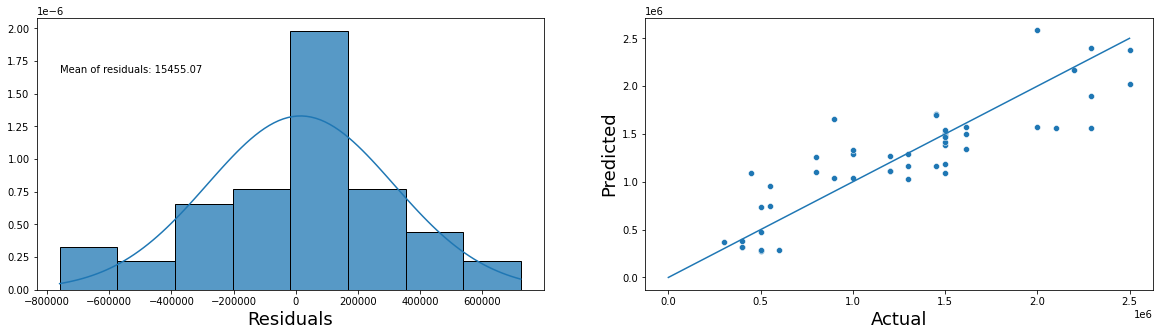

In [79]:
plot_model_evaluation(y_test, pred_test)

#### **Report**

**Evaluating SGD model**

checking out its coefficients and how we can interpret them.

In [80]:
coeff_df = pd.DataFrame(sdg_reg.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
bedrooms,92621.289302
bathrooms,-140757.538410
toilets,160641.592624
parking,13151.827086
New/Old,-67530.483445
Type,163888.241106
Serviced/Not,147892.460383
Estate/Not,102667.012335
Totalrooms,112505.343515
gbagada,-72911.188738


* Holding all other features fixed, a 1 unit increase in bedrooms is associated with an increase of N92621.289302.
* Holding all other features fixed, a 1 unit increase in toilet is associated with an increase of N160641.592624
* Holding all other features fixed, a 1 unit increase in parking is associated with an increase of N13151.827086
* Holding all other features fixed, if the Types of house is either 'new','luxurious','executive','luxury','newly','attic','Exquisitely'is associated will give an increase of N163888.241106
* Holding all other features fixed, if the house is Serviced it is associated with an increase of N147892.460383
* Holding all other features fixed, if the house is in an Estate it is  associated with an increase of N102667.012335
* Holding all other features fixed, a 1 unit increase in Totalrooms is associated with an increase of N112505.343515
* Holding all other features fixed, if house in surulere it is associated with an increase of N26014.529900.

All other features had a negative coefficient.


In this work, several tests have been performed using linear
regression, regularization algorithms, Stochastic Gradient Descent, Random Forest, XGBoost, K-NearestNeighbor, Decision tree Regressor and Support vetor to perform
house price prediction. Based on the data of 241 houses,
the system is modeling house price predictions and we tried  9 algorithms 
each learned from the training data and predicted on the test data then we checked the best performing model using cross validation. After which we had 7 models then we used MAPE, MAE and RMSE to select the over all best. The algorithms used the following features of houses located in Lagos such as 
Bedrooms,bathrooms,toilets,parking,New/old houses, Type of house, Estate or not, serviced  or not and total rooms and location. Based on the
result from test using the assigned metrics, Linear Regression, Lasso Regression , Ridge Regression, EslasticNet, SGD had the best performance using some advanced parameters in Lasso Regression , Ridge Regression, ElasticNet, SGD. We conclude that SGD had the over all best using MAPE, MAE and RMSE together but looking closly at the RMSE. Those best values of
parameters 1000 iterations, tol=-np.infty,penalty='l2', learning_rate="constant", eta0=0.0005 can get minimum prediction error
RMSE as 300419, MSE as 90252146467 and MAPE as 23. For the other model excluding Linear Regression, Lasso Regression , Ridge Regression, EslasticNet which had similar result with SGD, the error prediction
values are still large. 

**Challanges**
1. Not enough data
2. Explanination from domain expert on the outliers in different building locations
3. Features such as Electricity availability and water availability was missing as this pose a great important to house prices in Lagos.

Tuning the SGD model more can help obtain
smaller error prediction values and using more data to get the
better result

From the analysis the following will likely infulence house prices such as Total rooms, The type of House, where the house is located either in an estate or not and if the the house is serviced or not thats if it has a regular house management service. However, we couldn't tell if constant electricity, water and closeness to recreation centre can increse the price of a particular house. we also observed some collinerity among features and this is where algorithm like LASSO, RIDGE and ElasticNET tends to be smarter.


## **Stage 4. Probability theory**

**Step 1**
* Pick up a lottery. For example, https://www.eurojackpot.com/ etc. Do not pick up
bingo type lotteries.
* Describe the lottery.

Eurojackpot is based in Europe and offers jackpots as high as €90 million every Friday. You are required to choose numbers and depending on the number of correct predictions, you are entitled to stipulated winnings.

* Describe the winning conditions

Correctly choose 5 numbers from 1 – 50 and an additional two numbers from 1 - 10 to win the jackpot.


**Step 2**

Compute the probabilities of winning for each case. For example, as in here
https://en.wikipedia.org/wiki/Eurojackpot

**Step 3**

Explain your computation.

**Step 4**

Write a small report on that.

\begin{equation*}
\frac{n!}{r(n-r)!}
\end{equation*}

n = Total number of possible numbers

r = Number of numbers chosen 

! = Factorial

### **1 Jackpot**
(5 correct numbers out of 50 plus 2 supplenentary numbers out of another 10 i.e 5 + 2)**

Solution:

To get 5 numbers out of 50:

n=50

r=5 

\begin{equation*}
\frac{50!}{5(50-5)!} = \frac{50!}{5! * 45!} = 2118760
\end{equation*}

To get 2 supplementary numbers out of 10

n=10

r=2

\begin{equation*}
\frac{10!}{2(10-2)!} = \frac{10!}{2! * 8!} = 45
\end{equation*}



In [7]:
import math 

def fact(x,y,z):
  fact1 = math.factorial(x)
  fact2 = math.factorial(y)
  fact3 = math.factorial(z)
  x = fact1/ (fact2 * fact3)
  print(x)

In [9]:
fact(50,5,45), fact(10,2,8)

2118760.0
45.0


(None, None)

probability of 5 correct numbers out of 50 = 2118760 * 45 

plus 2 supplementary numbers out of 10 = 95,344,199.4

Therefore, probability of 5 + 2 = 1: 95,344,199.4

### **2. choosing correctly 5 out of 5 and 1 out of 2**

5 correct numbers out of 50  plus 1 of 10 supplementary numbers i.e 5+1 

probability of 5 out of 50 = 1:2118760

probability of choosing 1 oout of 2 supplementary numbers i.e 5 + 1

\begin{equation*}
\frac{r!}{k!(r-k)!} * \frac{(n-r)!}{((n-r)-(r-k)! * (r-k)!)}
\end{equation*}

k = Number you choose correctly

r = Holds number drawn 

n = holds number of possible numbers 

\begin{equation*}
\frac{2!}{1!(2-1)!} * \frac{(10-2)!}{((10-2)-(2-1)! * (2-1)!)} = \frac{2 * 40320}{5040} = 16
\end{equation*}




In [58]:
def factII(n,r,k):
  fact1 = math.factorial(n)
  fact2 = math.factorial(r)
  fact3 = math.factorial(k)+
  a = n-r
  b = r -k
  c = a - b
  fact4 = math.factorial(a)
  fact5 = math.factorial(c)
  fact6 = math.factorial(b)
  x = fact2 * fact4
  y = fact3*(fact6) * ((fact5) * (fact6))
  z = x/y
  print(z)

In [59]:
factII(10,2,1)

16.0


probability of choosing 1 out of 2 supplementary numbers = 16/45

Thus,  the probability of 5 + 1 = 2118760 * 45/16 = 5959013

Probability of 5 + 1 =  1:5959012.5 

### **3. Choosing correctly 5 out of 5 and 0 out of 2**

5 correct numbers out of 50  plus 0 of 10 supplementary numbers i.e 5+0

Probability of 5 out of 50  = 1:2118760


probability of choosing 0 out of 2 supplementary numbers 

\begin{equation*}
\frac{r!}{k!(r-k)!} * \frac{(n-r)!}{((n-r)-(r-k)! * (r-k)!)}
\end{equation*}

k = Number you choose correctly

r = Holds number drawn 

n = holds number of possible numbers 

\begin{equation*}
\frac{2!}{1!(2-0)!} * \frac{(10-2)!}{((10-2)-(2-0)! * (2-0)!)} = \frac{2 * 40320}{2 * 6! * 2} = 28
\end{equation*}




In [60]:
factII(10,2,0)

28.0


Probability of choosing 0 out of 2 supplementary numbers = 28/45

Thus, the probability of 5 + 0  = 2118760 * 45/28 = 3405150

Probability of 5 + 0 = 1:3405150

### **4. Choosing correctly 4 out of 5 and 2 out of 2**
4 correct numbers out of 50  plus 2 of 10 supplementary numbers i.e 4+2

Probability of 4:


\begin{equation*}
\frac{r!}{k!(r-k)!} * \frac{(n-r)!}{((n-r)-(r-k)! * (r-k)!)} =
\end{equation*}


\begin{equation*}
\frac{5!}{4!(5-4)!} * \frac{(50-5)!}{((50-5)-(5-4)! * (5-4)!)} = \frac{120}{24} * \frac{45!}{44!} = 225
\end{equation*}

In [61]:
factII(50,5,4)

225.0


Probability of 4 from 5 = 225/2118760

Probability of 2 supplementary numbers = 1/45 

Probability of 4 + 2 = 225/2118760 * 1/45 = 1:423752

### **5. Choosing correctly 4 out of 5 ang 1 out of 2**

probability of 4 from 5 = 225/2118760

Probrbility of 1 out of 2 supplementary numbers = 16/45 

Probability of 4 + 1 = 225/2118760 * 16/45 = 1:26485 



### **6. choosing correctly 4 out of 5 and 0 out of 2**

Probability of 4 from 5 = 225/2118760 

Probability of choosing 0 out of 2 = 28/45 

Probability of 4 + 0  = 225/2118760 * 28/45 = 1:15134

### **7. Choosing correctly 3 out of 5 and 2 out of 2** 

3 correct numbers out of 50  plus 2 of 10 supplementary numbers i.e 3+2

Probability of 3 out of 5:

\begin{equation*}
\frac{5!}{3!(5-3)!} * \frac{(50-3)!}{((50-3)-(5-3)! * (5-3)!)} = \frac{120}{12} * \frac{990}{1} = 9900
\end{equation*}

In [62]:
factII(50,5,3)

9900.0


Probability of 3 from 5  = 9900/2118760

Probability of 2 from 2 = 1/45 

Probability of 3 + 2 = 990/2118760 * 1/45  = 1:9631

### **8. Choosing correctly 3 out of 5 and 1 out of 2**

3 correct numbers out of 50 plus 1 correct number out of 10 supplementary numbers 

Probability of 3 from 5  = 9900/2118760

Probability of 1 from 2  = 16/45

Probability of 3 : 5 = 9900/2118760 * 16/45  = 1:602

### **9. Choosing correctly 3 out of 5 and 0 out of 2**

3 correct numbers out of 50 

Probability of 3 from 5  = 9900/2118760

Probability of 0 from 2  = 28/45 

Probability of 3 : 0  = 9900/2118760 * 28/45  = 1:344

### **10. Choosing correctly 2 out of 5 and 2 out of 2**
2 correct numbers out of 50  plus 2 of 10 supplementary numbers i.e 2+2

Probability of 2 out of 5

\begin{equation*}
\frac{5!}{2!(5-2)!} * \frac{(50-2)!}{((50-2)-(5-2)! * (5-2)!)} = \frac{120}{12} * \frac{45}{42! * 3!} = 141900
\end{equation*}



In [63]:
factII(50,5,2)

141900.0


Probability of 2 from 5  = 141900/2118760 

Probability of 2 from 2  = 1/45

Probability of 2 + 2 = 141900/2118760 * 1/45 = 1:672


### **11. Choosing correctly 2 out of 5 and 1 out of 2**

Probability of 2 out of 5  = 141900/2118760

Probability of 1 out of 2 = 16/45 

Probability of 2+1 = 141900/2118760 * 16/45 = 1:42

### 12. **Choosing correctly 1 out of 5 and 2 out of 2**

Probability of 1 out of 5 

\begin{equation*}
\frac{5!}{1!(5-1)!} * \frac{(50-1)!}{((50-1)-(5-1)! * (5-1)!)} = \frac{120}{24} * \frac{45!}{41! * 4!} = 744975
\end{equation*}


In [64]:
factII(50,5,1)

744975.0


Probability of 1 out of 5  = 744975/2118760

Probability of 2 out of 2  = 1/45

Probability of 1:2 = 1:128

| Winning      | Probability of winning|
| ----------- | ----------- |
|   5 +2 (jackpot)  | 1 : 95 344 200|
| 5 + 1 | 1 : 5 959 013| 
| 5 | 1 : 3 405 150|
| 4 + 2| 1 : 423 752|
| 4 + 1| 1 :  26 485|
| 4 | 1 : 15 134|
| 3 + 2 | 1 : 9 631|
| 3 + 1 | 1 : 602|
| 3 | 1 : 344|
| 2 + 2| 1 : 672|
| 2 + 1| 1 : 42|
| 1 + 2| 1: 128|

Eurojackpot: This jackpot lottery was first proposed in 2006 to compete with the EuroMillions but started in March 2012. The idea behind this lottery system is to match 5 correct numbers out of 50 numbers plus another 2 suppelementary numbers out of anither 10. The odds of winning each is comouted above. It it note worthy to mention that 18 countries participates in this lottery system and evaluation of the winning lottery tickets is done in Germany and Denmark. Also, in a case the jackpot is not won for 12 consecutive draws, the 13th draw will be subject to rolldown whereby if no winner is able to match all 7 winning numbers, the jackpot is paid out to the next winning tier where a winner is available